<a href="https://colab.research.google.com/github/ashimikuml/googlecolab-trial/blob/master/torchvision_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 初期設定
+ 編集→ノートブックの設定→ハードウェアアクセラレータ→GPU
+ ランタイム→ランタイムのタイプを変更→ハードウェアアクセラレータ→GPU

# バージョン・ライブラリの確認
一応インストールしてみたけどpytorchもtorchvisionも全部入っている

In [6]:
!python --version

Python 3.6.9


In [7]:
!ls /usr/lib/x86_64-linux-gnu/libcuda*

/usr/lib/x86_64-linux-gnu/libcuda.so
/usr/lib/x86_64-linux-gnu/libcuda.so.1
/usr/lib/x86_64-linux-gnu/libcuda.so.440.44


In [8]:
!pip3 install torch torchvision

# PytorchでImage Netのinference

In [9]:
import torch
torch.cuda.is_available()

True

## Google Driveのマウント

In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [19]:
! ls /content/gdrive/My\ Drive/colab/data

cat.jpg


## 画像読み込み

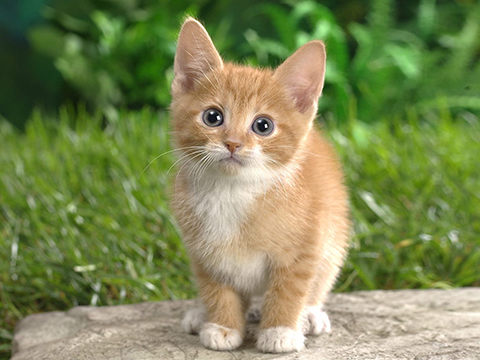

In [25]:
from PIL import Image
img_path = '/content/gdrive/My Drive/colab/data/cat.jpg'
img = Image.open(img_path)
img

In [53]:
import numpy as np
img = img.resize((224, 224))
img_arr = np.asarray(img).astype(np.float32)
mean, std = np.array([0.485, 0.456, 0.406]), np.array([0.229, 0.224, 0.225])
img_arr = (img_arr / 255.0 - mean) / std
img_arr = img_arr.transpose(2, 0, 1)
img_arr = img_arr[None, :]
img_tensor = torch.from_numpy(img_arr)
img_tensor.size()

torch.Size([1, 3, 224, 224])

## クラスとインデックスのマップ

In [0]:
import urllib.request
url = 'https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt'
with urllib.request.urlopen(url) as res:
  labels = eval(res.read())

## モデルのロード

In [0]:
from torchvision.models.resnet import resnet50
model = resnet50(pretrained=True)

## 推論

In [0]:
device = torch.device('cuda')
model.to(device)
model.eval()
img_tensor = img_tensor.to(device).float()

In [57]:
with torch.no_grad():
  result = model(img_tensor)
  result = torch.nn.functional.softmax(result, dim=1)
result.size()

torch.Size([1, 1000])

In [58]:
result_arr = result.cpu().numpy()[0]
top5 = np.argsort(result_arr)[::-1][:5]
for idx in top5:
  print('Class:{}\tProb:{}'.format(labels[idx], result_arr[idx]))

Class:lynx, catamount	Prob:0.292466402053833
Class:tiger cat	Prob:0.28147873282432556
Class:tabby, tabby cat	Prob:0.16099901497364044
Class:Egyptian cat	Prob:0.11034245789051056
Class:kit fox, Vulpes macrotis	Prob:0.02054421789944172
